<a href="https://colab.research.google.com/github/pranitha2144/Internship-iith/blob/Resnet/Copy_of_vgg16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
from keras.models import Model
from keras.layers import Dense,Dropout
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

Using TensorFlow backend.


In [2]:
trdata = ImageDataGenerator(zoom_range=0.3, width_shift_range=0.2,horizontal_flip=True,vertical_flip=True)
traindata = trdata.flow_from_directory(directory="/content/drive/My Drive/data_liver/train",target_size=(224,224),batch_size=32)
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory="/content/drive/My Drive/data_liver/val", target_size=(224,224),batch_size=32)

Found 700 images belonging to 4 classes.
Found 100 images belonging to 4 classes.


In [3]:
from keras.applications.vgg16 import VGG16
vggmodel = VGG16(weights='imagenet',include_top=True)

In [4]:
vggmodel.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [5]:
for layers in (vggmodel.layers)[:19]:
    print(layers)
    layers.trainable = False

In [6]:
vggmodel.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [7]:
from tensorflow.keras import regularizers
X= vggmodel.layers[-2].output
fc_1=Dense(4096,activation='relu')(X)
#dr_1=Dropout(0.3)(fc_1)
fc_2=Dense(4096, activation='relu')(fc_1)
#dr_2=Dropout(0.8)(fc_2)
#fc_3=Dense(4096,activation='relu')(dr_2)

predictions = Dense(4, activation="softmax")(fc_1)
model_final = Model(input = vggmodel.input, output = predictions)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  # Remove the CWD from sys.path while we load stuff.


In [8]:
model_final.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [9]:
model_final.compile(loss = "categorical_crossentropy", optimizer = keras.optimizers.Adam(lr=0.0001), metrics=["accuracy"])

In [10]:
model_final.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [11]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("/content/drive/My Drive/Best models/model_n_1.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=10, verbose=1, mode='auto')
hist=model_final.fit_generator(traindata,shuffle=True,steps_per_epoch=3, epochs= 100, validation_data= testdata,validation_steps=2, callbacks=[checkpoint,early])

Epoch 1/100
3/3 [==============================] - 92s 31s/step - loss: 1.6808 - accuracy: 0.4062 - val_loss: 1.4280 - val_accuracy: 0.6562

Epoch 00001: val_accuracy improved from -inf to 0.65625, saving model to /content/drive/My Drive/Best models/model_n_1.h5


/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


Epoch 2/100
3/3 [==============================] - 76s 25s/step - loss: 1.0458 - accuracy: 0.6354 - val_loss: 0.3843 - val_accuracy: 0.6389

Epoch 00002: val_accuracy did not improve from 0.65625
Epoch 3/100
3/3 [==============================] - 85s 28s/step - loss: 0.8773 - accuracy: 0.6146 - val_loss: 0.6700 - val_accuracy: 0.7500

Epoch 00003: val_accuracy improved from 0.65625 to 0.75000, saving model to /content/drive/My Drive/Best models/model_n_1.h5
Epoch 4/100
3/3 [==============================] - 74s 25s/step - loss: 0.8362 - accuracy: 0.6413 - val_loss: 0.8673 - val_accuracy: 0.8056

Epoch 00004: val_accuracy improved from 0.75000 to 0.80556, saving model to /content/drive/My Drive/Best models/model_n_1.h5
Epoch 5/100
3/3 [==============================] - 89s 30s/step - loss: 0.7100 - accuracy: 0.6979 - val_loss: 1.2827 - val_accuracy: 0.7500

Epoch 00005: val_accuracy did not improve from 0.80556
Epoch 6/100
3/3 [==============================] - 71s 24s/step - loss: 0.63

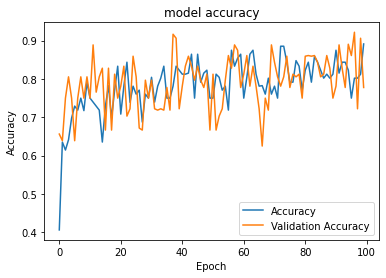

In [27]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])

plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy"])
plt.show()

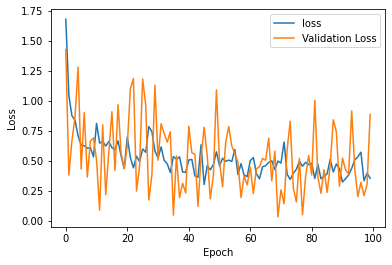

In [13]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["loss","Validation Loss"])
plt.show()

In [14]:
model_final.save("/content/drive/My Drive/Best models/model1_1.h5")

In [15]:
model_cnn=keras.models.load_model("/content/drive/My Drive/Best models/model_m_1.h5")

In [16]:
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

test_datagen = ImageDataGenerator()

In [17]:
validation_generator = test_datagen.flow_from_directory('/content/drive/My Drive/data_liver/test',
                                                        target_size=(224, 224))

Found 200 images belonging to 4 classes.


In [18]:
import numpy as np
#Confution Matrix and Classification Report
Y_pred = model_cnn.predict_generator(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
#target_names = ['grade1', 'grade0', 'grade2','grade3']
print(classification_report(validation_generator.classes, y_pred))

Confusion Matrix
[[11  5 22 12]
 [ 9  7 17 17]
 [11  6 17 16]
 [14  6 19 11]]
Classification Report
              precision    recall  f1-score   support

           0       0.24      0.22      0.23        50
           1       0.29      0.14      0.19        50
           2       0.23      0.34      0.27        50
           3       0.20      0.22      0.21        50

    accuracy                           0.23       200
   macro avg       0.24      0.23      0.23       200
weighted avg       0.24      0.23      0.23       200



In [19]:
import os
import numpy as np
actual=[]
predicted=[]
data_path='/content/drive/My Drive/data_liver/test'
data_dir_list=os.listdir(data_path)
for dataset in data_dir_list:
  print(dataset)
  img_list=os.listdir(data_path+'/'+dataset)
  correctCount=0
  wrongCount=0
  for img in img_list:
    img_path=data_path+'/'+dataset+'/'+img
    input_image = image.load_img(img_path,target_size=(224,224))
    input_image = np.asarray(input_image)
    input_image = np.expand_dims(input_image, axis=0)
    output = model_cnn.predict(input_image)
    ans='grade'+str(np.argmax(output[0],axis=0))
    if( ans in img):
      correctCount+=1
    else:
      wrongCount+=1
    actual.append(img[:6])
    predicted.append(ans)
  print("correct Count {} WrongCount {}".format(correctCount,wrongCount))

grade1
correct Count 16 WrongCount 34
grade0
correct Count 42 WrongCount 8
grade2
correct Count 50 WrongCount 0
grade3
correct Count 41 WrongCount 9


In [28]:
# Python script for confusion matrix creation. 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
results = confusion_matrix(actual, predicted) 

print ('Confusion Matrix :')
print(results) 
print ('Accuracy Score :',accuracy_score(actual, predicted)) 
print ('Report : ')
print (classification_report(actual, predicted)) 


Confusion Matrix :
[[38 11  0  1]
 [ 0 25  4 21]
 [ 0  1 49  0]
 [ 0  2  1 47]]
Accuracy Score : 0.795
Report : 
              precision    recall  f1-score   support

      grade0       1.00      0.76      0.86        50
      grade1       0.64      0.50      0.56        50
      grade2       0.91      0.98      0.94        50
      grade3       0.68      0.94      0.79        50

    accuracy                           0.80       200
   macro avg       0.81      0.80      0.79       200
weighted avg       0.81      0.80      0.79       200



In [21]:
import os
import numpy as np
actual=[]
predicted=[]
data_path='/content/drive/My Drive/data_liver/test'
data_dir_list=os.listdir(data_path)
for dataset in data_dir_list:
  print(dataset)
  img_list=os.listdir(data_path+'/'+dataset)
  correctCount=0
  wrongCount=0
  for img in img_list:
    img_path=data_path+'/'+dataset+'/'+img
    input_image = image.load_img(img_path,target_size=(224,224))
    input_image = np.asarray(input_image)
    input_image = np.expand_dims(input_image, axis=0)
    output = model_final.predict(input_image)
    ans='grade'+str(np.argmax(output[0],axis=0))
    if( ans in img):
      correctCount+=1
    else:
      wrongCount+=1
    actual.append(img[:6])
    predicted.append(ans)
  print("correct Count {} WrongCount {}".format(correctCount,wrongCount))

grade1
correct Count 25 WrongCount 25
grade0
correct Count 38 WrongCount 12
grade2
correct Count 49 WrongCount 1
grade3
correct Count 47 WrongCount 3


In [22]:
# Python script for confusion matrix creation. 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
results = confusion_matrix(actual, predicted) 

print ('Confusion Matrix :')
print(results) 
print ('Accuracy Score :',accuracy_score(actual, predicted)) 
print ('Report : ')
print (classification_report(actual, predicted)) 


Confusion Matrix :
[[38 11  0  1]
 [ 0 25  4 21]
 [ 0  1 49  0]
 [ 0  2  1 47]]
Accuracy Score : 0.795
Report : 
              precision    recall  f1-score   support

      grade0       1.00      0.76      0.86        50
      grade1       0.64      0.50      0.56        50
      grade2       0.91      0.98      0.94        50
      grade3       0.68      0.94      0.79        50

    accuracy                           0.80       200
   macro avg       0.81      0.80      0.79       200
weighted avg       0.81      0.80      0.79       200



In [23]:
tr_loss,tr_acc=model_final.evaluate(validation_generator)
tr_acc

7/7 [==============================] - 107s 15s/step


0.7950000166893005

In [24]:
tr_loss,tr_acc=model_final.evaluate(traindata)
tr_acc

22/22 [==============================] - 363s 17s/step


0.8514285683631897

In [25]:
tr_loss,tr_acc=model_cnn.evaluate(testdata)
tr_acc

4/4 [==============================] - 51s 13s/step


0.7200000286102295

In [26]:
saved_model=keras.models.load_model("/content/drive/My Drive/Best models/model_b_1.h5")

OSError: ignored

In [ ]:
tr_loss,tr_acc=saved_model.evaluate(validation_generator)
tr_acc

In [ ]:
tr_loss,tr_acc=saved_model.evaluate(testdata)
tr_acc

In [ ]:
model_final=keras.models.load_model("/content/drive/My Drive/Best models/model_f_1.h5")